In [1]:
import numpy as np
import random
from math import *

In [2]:
NUMBER_OF_NODE = 10;
NUMBER_OF_VOTE = "vote"
NUMBER_OF_VALIDATOR = "validator"
NUMBER_OF_DEPOSIT = "deposit"
NODE = "node"
SPEED = "speed"
RANKING = "ranking"
NUMBER_OF_EPOCH = "epoch"

#init nodes
def init_nodes(number_of_node):
    nodes = []
    for i in range(number_of_node):
        nodes.append({})
        nodes[i][NODE] = i+1
        nodes[i][SPEED] = 0
        nodes[i][RANKING] = 0
        nodes[i][NUMBER_OF_DEPOSIT] = 0
        nodes[i][NUMBER_OF_VOTE] = 0
        nodes[i][NUMBER_OF_VALIDATOR] = 0
        nodes[i][NUMBER_OF_EPOCH] = 0
        
    return nodes

In [3]:
#random speed of nodes
def random_nodes_speed(nodes):
    arr_speed = np.random.randint(low=5,high=10,size=len(nodes)).tolist()
    for i in range(len(arr_speed)):
        nodes[i][SPEED] = arr_speed[i]
    return arr_speed

In [49]:
#random number of epochs that masternode join in blockchain
def random_epochs_of_nodes(nodes):
    arr_epochs = np.random.randint(low=1,high=10000,size=len(nodes)).tolist()
    for i in range(len(nodes)):
        nodes[i][NUMBER_OF_EPOCH] = arr_epochs[i]
    return arr_epochs

In [5]:
def deposit_votes(nodes):
    arr_deposit_vote = np.random.randint(low=50000,high=100000,size=len(nodes)).tolist()
#     arr_deposit_vote = np.sort(arr_deposit_vote)[::-1]
    for i in range(len(arr_deposit_vote)):
        nodes[i][NUMBER_OF_DEPOSIT] = arr_deposit_vote[i]
    return arr_deposit_vote

In [6]:
# chose a leader node by voting
def vote_leader(nodes):
    
    #random array with length is number of canidate of leader
    arr_random = np.random.rand(len(nodes)).tolist()
    
    #select lead node
    index_of_leader = -1
    maximum = -1
    arr_leader = []
    for i in range(len(nodes)):
        multi = nodes[i][NUMBER_OF_DEPOSIT] * arr_random[i]
        arr_leader.append(multi)
        if multi > maximum:
            index_of_leader = i
            maximum = arr_leader[i]
    nodes[index_of_leader][NUMBER_OF_VOTE] += 1
    return index_of_leader

In [7]:
# Ranking for each masternode
def ranking(nodes, arr_deposit_vote, arr_speed, total_epoch, epoch_current):
    total_deposit = sum(arr_deposit_vote)

    total_vote = 2000  # Total voting in one epoch
    speed_arg = sum(arr_speed)/len(nodes)
    a = 0.6
    b,c,d,e = 0.25, 0.1, 0.30, 0.35
    for i in range(len(arr_deposit_vote)):
        epoch_join = epoch_current - total_epoch + nodes[i][NUMBER_OF_EPOCH]
        trust = 0
        if(epoch_join > 0):
            trust = b*(epoch_join/total_epoch) + c*(
                    nodes[i][SPEED]/speed_arg) + d*(
                    nodes[i][NUMBER_OF_VOTE]/epoch_join) + e*(
                    nodes[i][NUMBER_OF_VALIDATOR]/epoch_join) + (1-b-c-d-e)*(
                    nodes[i][NUMBER_OF_VOTE]/total_vote)
        
        vote_arg_deposit = arr_deposit_vote[i]/total_deposit
        nodes[i][RANKING] = a*(vote_arg_deposit) + (1-a)*trust

In [8]:
# Random validator base on Ranking of each node
def random_validator(nodes, arr_deposit_vote, leader):
    index_of_validator = -1
    maximum = -1
    
    arr_random = np.random.rand(len(nodes)).tolist()
    for i in range(len(arr_random)):
        if nodes[i][RANKING] == 0:
            point = arr_random[i]
        else:
            point = nodes[i][RANKING] * arr_random[i]
            
        if point > maximum:
            maximum = point
            if i != leader:
                index_of_validator = i
                
    nodes[index_of_validator][NUMBER_OF_VALIDATOR] += 1
    return index_of_validator

In [50]:
nodes = init_nodes(150)
total_epoch = 10000  # Total epoch in blockchain
arr_speed = random_nodes_speed(nodes)
random_epochs_of_nodes(nodes)
for i in range(total_epoch):
    arr_deposit_vote = deposit_votes(nodes)
    leader = vote_leader(nodes)
    validator = random_validator(nodes, arr_deposit_vote, leader)
    ranking(nodes, arr_deposit_vote, arr_speed, total_epoch, i)

In [51]:
x_array = []
leader_y_array = []
deposit_y_array = []
validator_y_array = []
epoch_y_array = []
ranking_y_array = []

for i in range(len(nodes)):
    x_array.append(i)
    leader_y_array.append(nodes[i][NUMBER_OF_VOTE])
    deposit_y_array.append(nodes[i][NUMBER_OF_DEPOSIT])
    validator_y_array.append(nodes[i][NUMBER_OF_VALIDATOR])
    epoch_y_array.append(nodes[i][NUMBER_OF_EPOCH])
    ranking_y_array.append(nodes[i][RANKING])

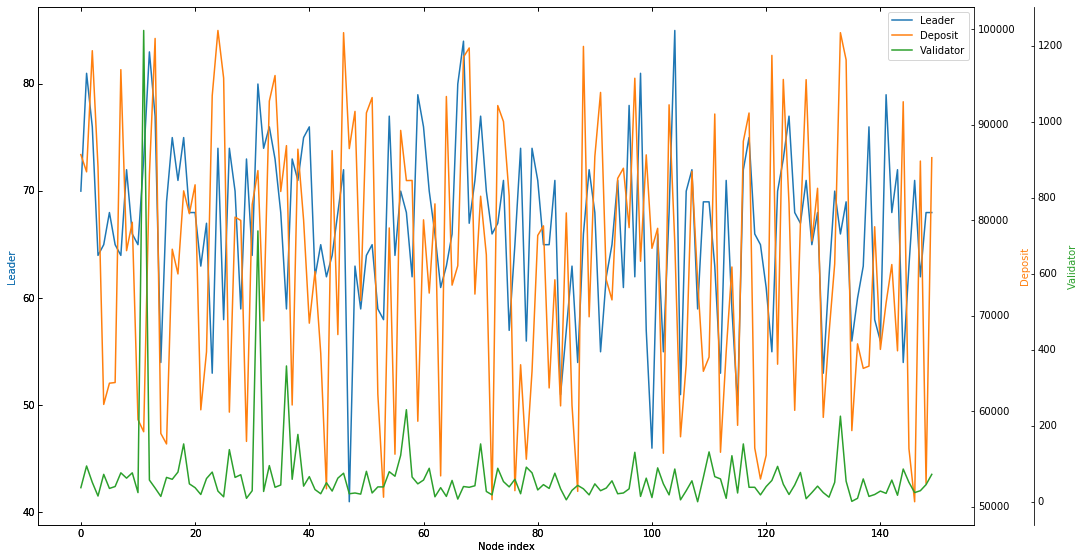

In [52]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.set_xlabel("Node index")
host.set_ylabel("Leader")

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Deposit")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.set_ylabel("Validator")
offset = (60, 0)
new_axisline = par2.get_grid_helper().new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

fig.add_axes(host)

host.set_xlabel("Node index")
host.set_ylabel("Leader")
par1.set_ylabel("Deposit")

p1, = host.plot(x_array, leader_y_array, label="Leader")
p2, = par1.plot(x_array, deposit_y_array, label="Deposit")
p3, = par2.plot(x_array, validator_y_array, label="Validator")

# par1.set_ylim(0, 4)
# par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())

plt.show()

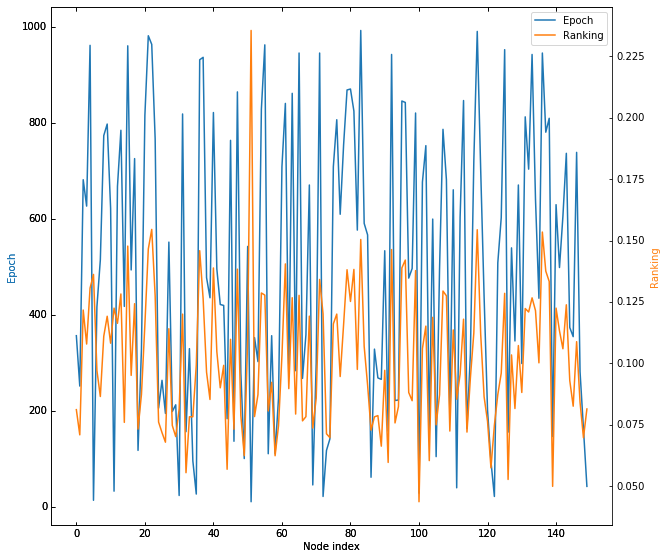

In [42]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)

host.set_xlabel("Node index")
host.set_ylabel("Leader")

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Deposit")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

fig.add_axes(host)

host.set_xlabel("Node index")
host.set_ylabel("Epoch")
par1.set_ylabel("Ranking")

p1, = host.plot(x_array, epoch_y_array, label="Epoch")
p2, = par1.plot(x_array, ranking_y_array, label="Ranking")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

plt.show()

In [43]:
nodes

[{'deposit': 55721,
  'epoch': 357,
  'node': 1,
  'ranking': 0.08117010871375274,
  'speed': 7,
  'validator': 2,
  'vote': 7},
 {'deposit': 80650,
  'epoch': 252,
  'node': 2,
  'ranking': 0.07091206815346572,
  'speed': 6,
  'validator': 7,
  'vote': 8},
 {'deposit': 50781,
  'epoch': 682,
  'node': 3,
  'ranking': 0.12173078338505927,
  'speed': 9,
  'validator': 0,
  'vote': 1},
 {'deposit': 72586,
  'epoch': 627,
  'node': 4,
  'ranking': 0.10788661320704293,
  'speed': 7,
  'validator': 2,
  'vote': 8},
 {'deposit': 97186,
  'epoch': 962,
  'node': 5,
  'ranking': 0.13067263313673563,
  'speed': 5,
  'validator': 1,
  'vote': 9},
 {'deposit': 69302,
  'epoch': 14,
  'node': 6,
  'ranking': 0.1362323362024102,
  'speed': 8,
  'validator': 2,
  'vote': 7},
 {'deposit': 61104,
  'epoch': 417,
  'node': 7,
  'ranking': 0.09713274380483973,
  'speed': 9,
  'validator': 2,
  'vote': 3},
 {'deposit': 74832,
  'epoch': 515,
  'node': 8,
  'ranking': 0.08653051229633019,
  'speed': 5,
  

In [44]:
node_none = []
for i in range(len(nodes)):
    if nodes[i][NUMBER_OF_VALIDATOR] == 0:
        node_none.append(nodes[i])

In [45]:
node_none

[{'deposit': 50781,
  'epoch': 682,
  'node': 3,
  'ranking': 0.12173078338505927,
  'speed': 9,
  'validator': 0,
  'vote': 1},
 {'deposit': 94613,
  'epoch': 774,
  'node': 9,
  'ranking': 0.11108955712397536,
  'speed': 5,
  'validator': 0,
  'vote': 4},
 {'deposit': 81867,
  'epoch': 798,
  'node': 10,
  'ranking': 0.11920169362100032,
  'speed': 6,
  'validator': 0,
  'vote': 9},
 {'deposit': 84417,
  'epoch': 785,
  'node': 14,
  'ranking': 0.12827485968484223,
  'speed': 8,
  'validator': 0,
  'vote': 2},
 {'deposit': 94118,
  'epoch': 418,
  'node': 15,
  'ranking': 0.0759937992056846,
  'speed': 5,
  'validator': 0,
  'vote': 4},
 {'deposit': 87888,
  'epoch': 118,
  'node': 19,
  'ranking': 0.07324845793822671,
  'speed': 9,
  'validator': 0,
  'vote': 6},
 {'deposit': 97630,
  'epoch': 816,
  'node': 21,
  'ranking': 0.11585701040498741,
  'speed': 5,
  'validator': 0,
  'vote': 7},
 {'deposit': 86038,
  'epoch': 157,
  'node': 33,
  'ranking': 0.05550314313840898,
  'speed'

In [46]:
len(node_none)

32

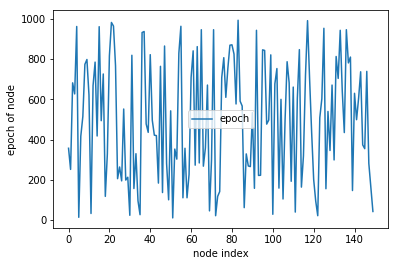

In [47]:
plt.xlabel("node index")
plt.ylabel("epoch of node")

plt.plot(x_array, epoch_y_array, label='epoch')
plt.legend()
plt.show()

In [27]:
max_node_none = -1
for i in range(len(node_none)):
    if node_none[i][RANKING] > max_node_none:
        max_node_none = node_none[i][RANKING]
max_node_none

0.13348257990558002

In [28]:
max_node = -1
for i in range(len(nodes)):
    if nodes[i][RANKING] > max_node:
        max_node = nodes[i][RANKING]
max_node

0.18132602131954592

In [31]:
node_max_validator = -1
max_validator = -1
for i in range(len(nodes)):
    if nodes[i][NUMBER_OF_VALIDATOR] > max_validator:
        max_validator = nodes[i][NUMBER_OF_VALIDATOR]
        node_max_validator = nodes[i]
node_max_validator

{'deposit': 65505,
 'epoch': 994,
 'node': 35,
 'ranking': 0.17245394798094338,
 'speed': 9,
 'validator': 103,
 'vote': 12}